In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import ode


**Integrator**

In [84]:
# See Wk11_ODESystems.pdf
#plot in phase space = plot against one another
def integrator(dx, dy, t_interval, initial_conditions, init=None, T=None):
    def vdp1(t, y, init=init):
        a = 0.15
        k = 8
        eps0 = 0.002
        mu1 = 0.2
        mu2 = 0.3


        n = len(y)
        dydt = np.zeros((n, 1))
    #     dydt[0] = y[1]
    #     dydt[0] = h
#         dydt[0] = -k*v*(v-a)*(v-1) - v*h
        if T is not None:
            dydt[0] = dx(y[0], y[1], t, init, T)
        elif init is not None:
            dydt[0] = dx(y[0], y[1], t, init)
        else:
            dydt[0] = dx(y[0], y[1], t)
        dydt[1] = dy(y[0], y[1])
    #     dydt[1] = (1 - y[0]**2)*y[1] - y[0]
    #     dydt[1] = (1 - v**2)*h - v
#         dydt[1] = (eps0 + (mu1 * h) / (v + mu2)) * ((-h) - k * v * (v - a -1))
        return dydt

    #start and end
    t0, t1 = t_interval[0], t_interval[1]

#     t_int = np.linspace(t0, t1+1, 500) # points of evaluation of solution
    t_int = np.arange(t0, t1+1, 0.2)
    # initial value
    y0 = initial_conditions

    #arrays for solution
    y = np.zeros((len(t_int), 1))
    x = np.zeros((len(t_int), 1))
    t = np.zeros((len(t_int), 1))
    
    y[0] = y0[1]
    x[0] = y0[0]
    
    
    # dopri5" Imitates MATLAB's ode45 function (uses Runge-Kutta 4, 5)
    r = ode(vdp1).set_integrator("dopri5", method="bdf")  # choice of method
    r.set_initial_value(y0, t0)   # initial values (x0, y0), t0
    
    # Integrate the ODE(s) across each delta_t timestep
    k = 1 #iterates for number of desired time steps
    delta_t = 0.2 #length of time step
    while r.successful() and k < t_int.size:
#     while r.successful() and r.t < 500:
        
        r.integrate(r.t + delta_t)

        # Store the results to plot later
        t[k] = r.t
        x[k] = r.y[0]
        y[k] = r.y[1]
        k += 1
#     print(y)
#     plt.plot(t, y)
#     plt.show()
    return x, y, t

**Plotting Functions**

In [123]:
def flow(x_interval, y_interval, dx, dy, t, labels, step=1, integrate = False, initial_conditions=None, soln_label = None, init=None):
# close all; clear all; 
    # % This Matlab code generates a vector field for the system of ODEs 
    # % dx/dt = f(x,y), dy/dt = g(x,y)

    # % This code currently will find the vector field for the EXAMPLE problem
    # %           dx/dt = a*x2
    # %           dy/dt = -x1
    # %--------------------------------------------------------------------------
    # %        THIS IS NOT THE PROBLEM YOU ARE SOLVING FOR PROJECT 3!
    # % (Make any necessary adjustments to this code so that it generates the 
    # % vector field for the Project 3 system of equations.)
    # %--------------------------------------------------------------------------


    # % Set the axis limits
#     xmin = -5; xmax = 5; ymin = -5; ymax = 5;

    # %set step size for x and y;
#     xstep = 1; ystep = 1; 
    xmin = x_interval[0]
    xmax = x_interval[1]
    
    ymin = y_interval[0]
    ymax = y_interval[1]
    
    x = np.arange(xmin, xmax+1, step)
    y = np.arange(ymin, ymax+1, step)
    # x = np.arange(xmin, xmax+1)
    # y = np.arange(ymin, ymax+1)
    t2 = np.linspace(t[0], t[1], len(x))

    # %generate mesh for plotting
    [x, y] = np.meshgrid(x, y);


#     # %set parameter values 
#     a = 1; 
    if integrate:
        if initial_conditions is None:
            raise ValueError("Expected initial conditions")
        else:
            if init is None:
                x_sol, y_sol, _ = integrator(dx, dy, t, initial_conditions)
            else:
                x_sol, y_sol, _ = integrator(dx, dy, t, initial_conditions, init=init)
            plt.plot(x_sol, y_sol, label=soln_label)

#     # % Define the system of equations 
    if init is not None:
        dx = dx(x, y, t2, init);  
    else:
        dx = dx(x, y, t2); 
    dy = dy(x, y); 

    # %normalize vectors (to help plotting)
    dx = np.divide(dx, np.sqrt(np.power(dx, 2) + np.power(dy, 2))); 
    dy = np.divide(dy, np.sqrt(np.power(dx, 2) + np.power(dy, 2))); 
    dx = np.nan_to_num(dx)
    dy = np.nan_to_num(dy)

    # % Generate the vector field

    plt.quiver(x, y, dx,dy)
        
    
    # %change axes limits, add labels
    # axis([xmin, xmax, ymin, ymax])
    plt.xlim((xmin-0.05, xmax+0.05))
    plt.ylim((ymin-0.05, ymax+0.05))
    plt.title(labels[2])
    plt.xlabel('${}$'.format(labels[0]))
    plt.ylabel('${}$'.format(labels[1]))
    if soln_label is not None:
        plt.legend()
    # LEGEND!!!!!!!

def plot_nullclines(x_interval, y_interval, x_nullclines, y_nullclines, colors, labels, nullcline_labels, region_colors = True, alpha = 1.0):
    #takes in mins, maxes, list of nullclines, list of colors, labels
    xmin = x_interval[0]
    xmax = x_interval[1]
    ymin = y_interval[0]
    ymax = y_interval[1]
    
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)

    c = 0 # iterator for colors
    for i in range(len(x_nullclines)):
        if i==0:
            plt.plot(x_nullclines[i](y), y, colors[c], alpha = alpha, label=nullcline_labels[0])
        else:
            plt.plot(x_nullclines[i](y), y, colors[c], alpha = alpha)
        
        c+=1
    
    for i in range(len(y_nullclines)):
        if i == 0:
            plt.plot(x, y_nullclines[i](x), colors[c], alpha = alpha, label = nullcline_labels[1])
        else:
            plt.plot(x, y_nullclines[i](x), colors[c], alpha = alpha)
            
        c+=1
    
        

    # Fill between: 
#     plt.fill_between(x, y1, y2)
    if region_colors:
        plt.fill_between(x, y_nullclines[0](x), y_nullclines[2](x), alpha=0.2,color="steelblue", label="Northwest")
        plt.fill_between(x, y_nullclines[1](x), y_nullclines[2](x), alpha=0.2, color="purple", label="Northeast")
        # fill between upper parabola and ymax
        xlim = np.array([i for i in x if i > 0])

        plt.fill_between(xlim, y_nullclines[0](xlim), ymax, alpha=0.2, color="green", label="Southwest")
#         plt.legend()
    
    plt.legend()
    plt.xlim((xmin - 0.1, xmax))
    plt.ylim((ymin - 0.2, ymax))
    plt.xlabel('${}$'.format(labels[0]))
    plt.ylabel('${}$'.format(labels[1]))
#     plt.title(labels[2])
    
    
    

**3.1**

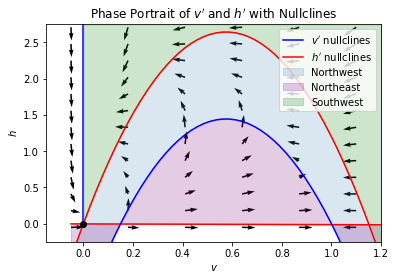

In [124]:
a = 0.15
k = 8
eps0 = 0.002
mu1 = 0.2
mu2 = 0.3

v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]

labels = ['v', 'h', 'Phase Portrait of $v\'$ and $h\'$ with Nullclines']

def dvdt(v, h, t, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2, init=0):
    return -k*v*(v-a)*(v-1) - v*h
def dhdt(v, h, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return (eps0 + (mu1 * h) / (v + mu2)) * ((-h) - k * v * (v - a -1))


def nullv_1(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return np.zeros(len(v))
def nullv_2(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -k * (v-a)*(v-1)

def nullh_1(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -k*v*(v-a-1)

def nullh_2(v, a=a, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    return -(eps0 * (v + mu2)) / mu1


flow(v_interval, 
     h_interval, 
     dvdt, dhdt,
     [0, 500],
     labels,
     step = 0.23)

h_nullclines = [nullh_1, nullh_2, nullv_2]
v_nullclines = [nullv_1]
colors = ['b', 'r', 'r', 'b']
nullcline_labels = ['$v\'$ nullclines', '$h\'$ nullclines']
plot_nullclines(v_interval,
                h_interval, 
                v_nullclines,
                h_nullclines,
                colors,
                labels,
                nullcline_labels
               )
# Plot equilibrium solution: v=0, h=0
plt.plot(0, 0, 'o', color='black')

In [125]:
v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]

v_0 = 0.5
h_0 = 0.2


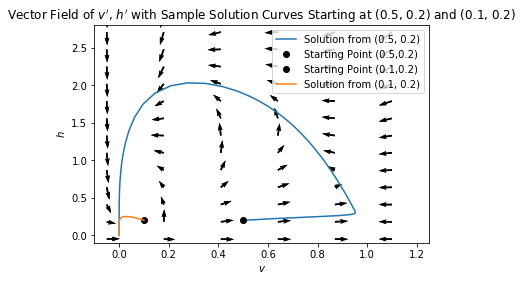

In [126]:
v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]
t_interval = [0, 500]

v0 = 0.5
h0 = 0.2
initial_conditions_3a=[v0, h0]

# labels[2] = 'Vector Field of $v\'$, $h\'$ with a Sample Solution Curve Starting at ({0}, {1})'.format(initial_conditions_3a[0], initial_conditions_3a[1])
# integrator(dvdt, dhdt, v_interval, h_interval, initial_conditions)
flow(v_interval,
     h_interval,
     dvdt, dhdt,
     t_interval,
     labels,
     step = 0.23, 
     integrate = True,
     initial_conditions=initial_conditions_3a,
     soln_label = 'Solution from (0.5, 0.2)',
     init=None
    )


initial_conditions_3b = [0.1, 0.2]
labels[2] = 'Vector Field of $v\'$, $h\'$ with Sample Solution Curves Starting at (0.5, 0.2) and (0.1, 0.2)'.format(initial_conditions_3b[0], initial_conditions_3b[1])
plt.plot(initial_conditions_3a[0], initial_conditions_3a[1], 'o', color='black', label="Starting Point ({},{})".format(initial_conditions_3a[0], initial_conditions_3a[1]))
plt.plot(initial_conditions_3b[0], initial_conditions_3b[1], 'o', color='black', label="Starting Point ({},{})".format(initial_conditions_3b[0], initial_conditions_3b[1]))



flow(v_interval,
     h_interval,
     dvdt, dhdt,
     t_interval,
     labels,
     step = 0.23, 
     integrate = True,
     initial_conditions=initial_conditions_3b,
     soln_label = 'Solution from (0.1, 0.2)',
     init=None
    )


**3.2**

In [127]:
#Functions for Section 3.2:

#Redefine dvdt to incorporate S(t)
def S(t, T, init):
    #Make this work for arrays and ints:
    if isinstance(t, float) or isinstance(t, int):
        if (t % T >= 10 and t % T <= 13):
            return init
        else:
            return 0
    else:
        ret = np.zeros(len(t))
        for i in range(len(t)):
            if t[i] % T >= 10 and t[i] % T <= 13:
                ret[i] = init
        return ret
    
def dvdt_st(v, h, t, init, T=100, k=k, eps0=eps0, mu1=mu1, mu2=mu2):
    # set S(t) to false (0) for part 3.1, true to use snippet for 3.2
#         print(t, St(t, T, init))
#     print(init)
    return -k*v*(v-a)*(v-1) - v*h + S(t, T, init)

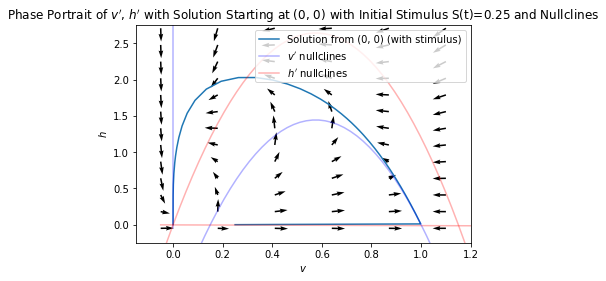

In [133]:
#Question 2
labels[2] = "Phase Portrait of $v\'$, $h\'$ with Solution Starting at (0, 0) with Initial Stimulus S(t)=0.25 and Nullclines"
a = 0.15
k = 8
eps0 = 0.002
mu1 = 0.2
mu2 = 0.3
init = 0
T = 100
t_interval = [0, 500]
v_interval = [-0.05, 1.2]
h_interval = [-0.05, 2.75]
initial_conditions = [0.25, 0]

flow(v_interval,
     h_interval,
     dvdt_st, dhdt,
     t_interval,
     labels,
     step = 0.23,
     integrate = True,
     initial_conditions=initial_conditions,
     soln_label = 'Solution from (0, 0) (with stimulus)',
     init=0,
    )

plot_nullclines(v_interval, 
                h_interval, 
                v_nullclines,
                h_nullclines,
                colors,
                labels,
                nullcline_labels,
                alpha = 0.3,
                region_colors = False)

Text(0.5,1,'Solution for t=[0, 500] (Delta t=0) From (0.25, 0) $')

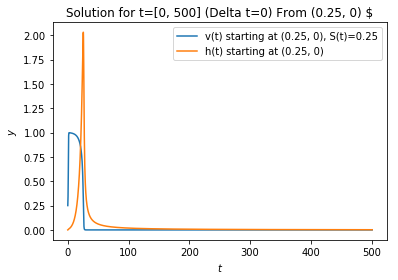

In [92]:
#Question 3a
initial_conditions = [0.25, 0]
t_interval = [0, 500]

#integrate v(t), h(t), plot both against t in same figure
vt, ht, t = integrator(dvdt_st, dhdt, t_interval, initial_conditions,init=0)

plt.plot(t, vt, label = 'v(t) starting at (0.25, 0), S(t)=0.25')
plt.plot(t, ht, label = 'h(t) starting at (0.25, 0)')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Solution for t=[0, 500] (Delta t=0) From (0.25, 0) $')


Text(0,0.5,'$y$')

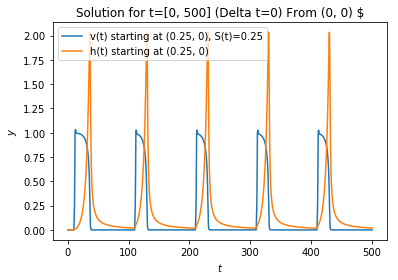

In [93]:
#Question 3b
initial_conditions = [0, 0]
t_interval = [0, 500]

#integrate v(t), h(t), plot both against t in same figure
vt, ht, t = integrator(dvdt_st, dhdt, t_interval, initial_conditions, init=0.25)

plt.plot(t, vt, label = 'v(t) starting at (0.25, 0), S(t)=0.25')
plt.plot(t, ht, label = 'h(t) starting at (0.25, 0)')
plt.legend()
plt.title('Solution for t=[0, 500] (Delta t=0) From (0, 0) $')
plt.xlabel('$t$')
plt.ylabel('$y$')


**4.0**

In [94]:
vc = 0.1 #critical voltage
initial_conditions = [0,0]
t_interval = [0, 1000]
delta_t = 0.2
init = 0.25
T_i = [100, 90, 80, 70, 60, 50]



def APD(t_down, t_up):
    # Params: 
        # t_up: time at which v becomes > vc
        # t_down: time at which v becomes < vc
        return t_down - t_up

APD_0 = []
h_bar = []

for i in range(len(T_i)):
    #Get values:
    vt, ht, t = integrator(dvdt_st, dhdt, t_interval, initial_conditions, init=init, T = T_i[i])
    
    # Load t_up, t_down:
    t_up = []
    t_down= []
    for i in range(len(vt)- 1):
        if vt[i] < vc and vt[i+1] > vc: #cross vc going up
            t_up.append(t[i])
        elif vt[i] > vc and vt[i+1] < vc: #cross vc going down
            t_down.append(t[i])
            
    #Check to be sure only complete beats represented:
    if len(t_up) != len(t_down):
        n = min(len(t_up),len(t_down))
        t_up = t_up[:n]
        t_down = t_down[:n]
    #Store APD for last beat:
    APD_0.append(APD(t_down[-1], t_up[-1]))
    
    #Get min h between 2nd to last t_down, last t_up:
    h_bar.append(min(ht[list(t).index(t_down[-2]) : list(t).index(t_up[-1])]))
    

Text(0.5,1,'Effect of Changing T on APD')

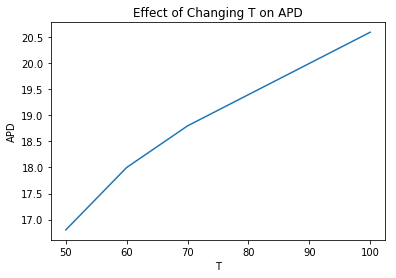

In [96]:
#Plot APD vs T:
plt.plot(T_i, APD_0)
plt.xlabel("T")
plt.ylabel("APD")
plt.title("Effect of Changing T on APD")

Text(0.5,1,'Effect of Changing T on $\\bar{h}$')

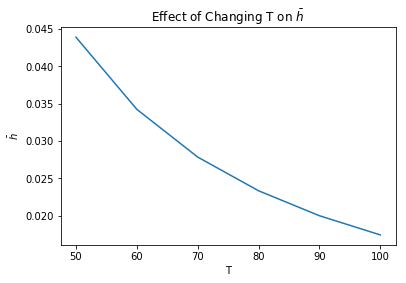

In [100]:
#Plot hbar vs T:
plt.plot(T_i, h_bar)
plt.xlabel("T")
plt.ylabel(r"$\bar{h}$")
plt.title(r"Effect of Changing T on $\bar{h}$")